In [1]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import category_encoders
from sklearn.preprocessing import StandardScaler



warnings.filterwarnings('ignore')

# Loading and Preprocessing Data

In [2]:
df = utils.load_data()
df = utils.log_transformation(df)
df = utils.break_datetime(df)
df = df[df['site_id'].isin([1, 6])]
df.head()

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,...,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,log_square_feet,year,weekofyear,dayofweek,month,hour
11199,105,2016-01-01 08:00:00,46.1071,1,Education,50623,NaN,5.0,2.2,NaN,...,1022.3,60.0,1.0,3.852424,10.832181,2015,53,5,1,8
11200,106,2016-01-01 08:00:00,0.7492,1,Education,5374,NaN,4.0,2.2,NaN,...,1022.3,60.0,1.0,0.559159,8.589514,2015,53,5,1,8
11201,107,2016-01-01 08:00:00,350.3670,1,Education,97532,2005.0,10.0,2.2,NaN,...,1022.3,60.0,1.0,5.861831,11.487946,2015,53,5,1,8
11202,108,2016-01-01 08:00:00,182.5310,1,Education,81580,1913.0,5.0,2.2,NaN,...,1022.3,60.0,1.0,5.212384,11.309352,2015,53,5,1,8
11203,109,2016-01-01 08:00:00,164.3510,1,Education,56995,1953.0,6.0,2.2,NaN,...,1022.3,60.0,1.0,5.108070,10.950736,2015,53,5,1,8


In [3]:
# Missing value Imputation for weather
df = utils.nan_weather_filler(df)

df.isnull().sum()

building_id                0
timestamp                  0
meter_reading              0
site_id                    0
primary_use                0
square_feet                0
year_built            134265
floor_count           102684
air_temperature            0
cloud_coverage             0
dew_temperature            0
precip_depth_1_hr          0
sea_level_pressure         0
wind_direction             0
wind_speed                 0
log_meter_reading          0
log_square_feet            0
year                       0
weekofyear                 0
dayofweek                  0
month                      0
hour                       0
dtype: int64

In [4]:
# Encoding
df = utils.label_encode(df,'primary_use')
df.head()

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,...,wind_direction,wind_speed,log_meter_reading,log_square_feet,year,weekofyear,dayofweek,month,hour,primary_use_encoded
11199,105,2016-01-01 08:00:00,46.1071,1,Education,50623,NaN,5.0,2.2,0.0,...,60.0,1.0,3.852424,10.832181,2015,53,5,1,8,0
11200,106,2016-01-01 08:00:00,0.7492,1,Education,5374,NaN,4.0,2.2,0.0,...,60.0,1.0,0.559159,8.589514,2015,53,5,1,8,0
11201,107,2016-01-01 08:00:00,350.3670,1,Education,97532,2005.0,10.0,2.2,0.0,...,60.0,1.0,5.861831,11.487946,2015,53,5,1,8,0
11202,108,2016-01-01 08:00:00,182.5310,1,Education,81580,1913.0,5.0,2.2,0.0,...,60.0,1.0,5.212384,11.309352,2015,53,5,1,8,0
11203,109,2016-01-01 08:00:00,164.3510,1,Education,56995,1953.0,6.0,2.2,0.0,...,60.0,1.0,5.108070,10.950736,2015,53,5,1,8,0


# Decision Tree Regressor

In [5]:
features = ['primary_use_encoded','log_square_feet','air_temperature','month','dayofweek','hour','month']
target = ['log_meter_reading']

### Train - Test Split

In [6]:
df=df.sort_values(by='timestamp')
train, test= train_test_split(df, test_size=0.20, shuffle=False)

In [7]:
y_train = train[target]
y_test = test[target]
X_train = train[features]
X_test = test[features]

### Quantitative Analysis

Primary Use

In [8]:
MSE_train = []
R2_train = []
MAE_train = []

MSE_test = []
R2_test = []
MAE_test = []

In [9]:
features = ['primary_use_encoded','hour','dayofweek','month']
DTR = DecisionTreeRegressor(max_depth=13)
DTR.fit(X_train[features],y_train)
y_pred_train = DTR.predict(X_train[features])
train_error_mse = mean_squared_error(y_train,y_pred_train)
train_error_r2 = r2_score(y_train,y_pred_train)
train_error_mae = mean_absolute_error(y_train,y_pred_train)

print("MSE for train set is: ",train_error_mse)

print("R2 for train set is: ",train_error_r2)

print("MAE for train set is: ",train_error_mae)

y_pred_test = DTR.predict(X_test[features])
test_error_mse = mean_squared_error(y_test,y_pred_test)
test_error_r2 = r2_score(y_test,y_pred_test)
test_error_mae = mean_absolute_error(y_test,y_pred_test)

print("MSE for test set is: ",test_error_mse)

print("R2 for test set is: ",test_error_r2)

print("MAE for test set is: ",test_error_mae)

MSE_train.append(train_error_mse)
R2_train.append(train_error_r2)
MAE_train.append(train_error_mae)

MSE_test.append(test_error_mse)
R2_test.append(test_error_r2)
MAE_test.append(test_error_mae)

MSE for train set is:  1.4095211601252566
R2 for train set is:  0.13640682930802495
MAE for train set is:  0.8801043086518684
MSE for test set is:  1.1998941090370039
R2 for test set is:  0.11834102716574035
MAE for test set is:  0.8280784323439626


Square Feet

In [10]:
features = ['log_square_feet','hour','dayofweek','month']
DTR = DecisionTreeRegressor(max_depth=13)
DTR.fit(X_train[features],y_train)
y_pred_train = DTR.predict(X_train[features])
train_error_mse = mean_squared_error(y_train,y_pred_train)
train_error_r2 = r2_score(y_train,y_pred_train)
train_error_mae = mean_absolute_error(y_train,y_pred_train)

print("MSE for train set is: ",train_error_mse)

print("R2 for train set is: ",train_error_r2)

print("MAE for train set is: ",train_error_mae)

y_pred_test = DTR.predict(X_test[features])
test_error_mse = mean_squared_error(y_test,y_pred_test)
test_error_r2 = r2_score(y_test,y_pred_test)
test_error_mae = mean_absolute_error(y_test,y_pred_test)

print("MSE for test set is: ",test_error_mse)

print("R2 for test set is: ",test_error_r2)

print("MAE for test set is: ",test_error_mae)

MSE_train.append(train_error_mse)
R2_train.append(train_error_r2)
MAE_train.append(train_error_mae)

MSE_test.append(test_error_mse)
R2_test.append(test_error_r2)
MAE_test.append(test_error_mae)

MSE for train set is:  0.05219361525403283
R2 for train set is:  0.9680217289656711
MAE for train set is:  0.11030258514602785
MSE for test set is:  0.5017053255847944
R2 for test set is:  0.6313566349820904
MAE for test set is:  0.275696512313287


Air Temperature

In [11]:
features = ['air_temperature','hour','dayofweek','month']
DTR = DecisionTreeRegressor(max_depth=13)
DTR.fit(X_train[features],y_train)
y_pred_train = DTR.predict(X_train[features])
train_error_mse = mean_squared_error(y_train,y_pred_train)
train_error_r2 = r2_score(y_train,y_pred_train)
train_error_mae = mean_absolute_error(y_train,y_pred_train)

print("MSE for train set is: ",train_error_mse)

print("R2 for train set is: ",train_error_r2)

print("MAE for train set is: ",train_error_mae)

y_pred_test = DTR.predict(X_test[features])
test_error_mse = mean_squared_error(y_test,y_pred_test)
test_error_r2 = r2_score(y_test,y_pred_test)
test_error_mae = mean_absolute_error(y_test,y_pred_test)

print("MSE for test set is: ",test_error_mse)

print("R2 for test set is: ",test_error_r2)

print("MAE for test set is: ",test_error_mae)

MSE_train.append(train_error_mse)
R2_train.append(train_error_r2)
MAE_train.append(train_error_mae)

MSE_test.append(test_error_mse)
R2_test.append(test_error_r2)
MAE_test.append(test_error_mae)

MSE for train set is:  1.6167669609505153
R2 for train set is:  0.009430333097511734
MAE for train set is:  0.989988409718753
MSE for test set is:  1.3638257565788803
R2 for test set is:  -0.0021127752975411696
MAE for test set is:  0.9185975059873517


Square Feet & Primary Use

In [12]:
features = ['log_square_feet','primary_use_encoded','hour','dayofweek','month']
DTR = DecisionTreeRegressor(max_depth=13)
DTR.fit(X_train[features],y_train)
y_pred_train = DTR.predict(X_train[features])
train_error_mse = mean_squared_error(y_train,y_pred_train)
train_error_r2 = r2_score(y_train,y_pred_train)
train_error_mae = mean_absolute_error(y_train,y_pred_train)

print("MSE for train set is: ",train_error_mse)

print("R2 for train set is: ",train_error_r2)


print("MAE for train set is: ",train_error_mae)

y_pred_test = DTR.predict(X_test[features])
test_error_mse = mean_squared_error(y_test,y_pred_test)
test_error_r2 = r2_score(y_test,y_pred_test)
test_error_mae = mean_absolute_error(y_test,y_pred_test)

print("MSE for test set is: ",test_error_mse)

print("R2 for test set is: ",test_error_r2)


print("MAE for test set is: ",test_error_mae)

MSE_train.append(train_error_mse)
R2_train.append(train_error_r2)
MAE_train.append(train_error_mae)

MSE_test.append(test_error_mse)
R2_test.append(test_error_r2)
MAE_test.append(test_error_mae)

MSE for train set is:  0.0372170938055955
R2 for train set is:  0.9771976264331791
MAE for train set is:  0.09286281978150729
MSE for test set is:  0.4902055833468871
R2 for test set is:  0.6398064230533638
MAE for test set is:  0.2581760717056154


Square Feet & Air Temperature

In [19]:
features = ['log_square_feet','air_temperature','hour','dayofweek','month']
DTR = DecisionTreeRegressor(max_depth=13)
DTR.fit(X_train[features],y_train)
y_pred_train = DTR.predict(X_train[features])
train_error_mse = mean_squared_error(y_train,y_pred_train)
train_error_r2 = r2_score(y_train,y_pred_train)
train_error_mae = mean_absolute_error(y_train,y_pred_train)

print("MSE for train set is: ",train_error_mse)

print("R2 for train set is: ",train_error_r2)


print("MAE for train set is: ",train_error_mae)

y_pred_test = DTR.predict(X_test[features])
test_error_mse = mean_squared_error(y_test,y_pred_test)
test_error_r2 = r2_score(y_test,y_pred_test)
test_error_mae = mean_absolute_error(y_test,y_pred_test)

print("MSE for test set is: ",test_error_mse)

print("R2 for test set is: ",test_error_r2)

print("MAE for test set is: ",test_error_mae)

MSE_train.append(train_error_mse)
R2_train.append(train_error_r2)
MAE_train.append(train_error_mae)

MSE_test.append(test_error_mse)
R2_test.append(test_error_r2)
MAE_test.append(test_error_mae)

MSE for train set is:  0.05048575650200518
R2 for train set is:  0.9690681092517439
MAE for train set is:  0.10576540261315927
MSE for test set is:  0.4985423331013742
R2 for test set is:  0.6336807406535925
MAE for test set is:  0.2749258008299707


All Features

In [18]:
features = ['air_temperature','log_square_feet','primary_use_encoded','hour','dayofweek','month']
DTR = DecisionTreeRegressor(max_depth=13)
DTR.fit(X_train[features],y_train)
y_pred_train = DTR.predict(X_train[features])
train_error_mse = mean_squared_error(y_train,y_pred_train)
train_error_r2 = r2_score(y_train,y_pred_train)

train_error_mae = mean_absolute_error(y_train,y_pred_train)

print("MSE for train set is: ",train_error_mse)

print("R2 for train set is: ",train_error_r2)


print("MAE for train set is: ",train_error_mae)

y_pred_test = DTR.predict(X_test[features])
test_error_mse = mean_squared_error(y_test,y_pred_test)
test_error_r2 = r2_score(y_test,y_pred_test)
test_error_mae = mean_absolute_error(y_test,y_pred_test)

print("MSE for test set is: ",test_error_mse)

print("R2 for test set is: ",test_error_r2)

print("MAE for test set is: ",test_error_mae)

MSE_train.append(train_error_mse)
R2_train.append(train_error_r2)
MAE_train.append(train_error_mae)

MSE_test.append(test_error_mse)
R2_test.append(test_error_r2)
MAE_test.append(test_error_mae)


MSE for train set is:  0.02588480619286566
R2 for train set is:  0.9841407546866074
MAE for train set is:  0.08196870716343202
MSE for test set is:  0.4839530780465318
R2 for test set is:  0.6444006429592989
MAE for test set is:  0.24950229593615172


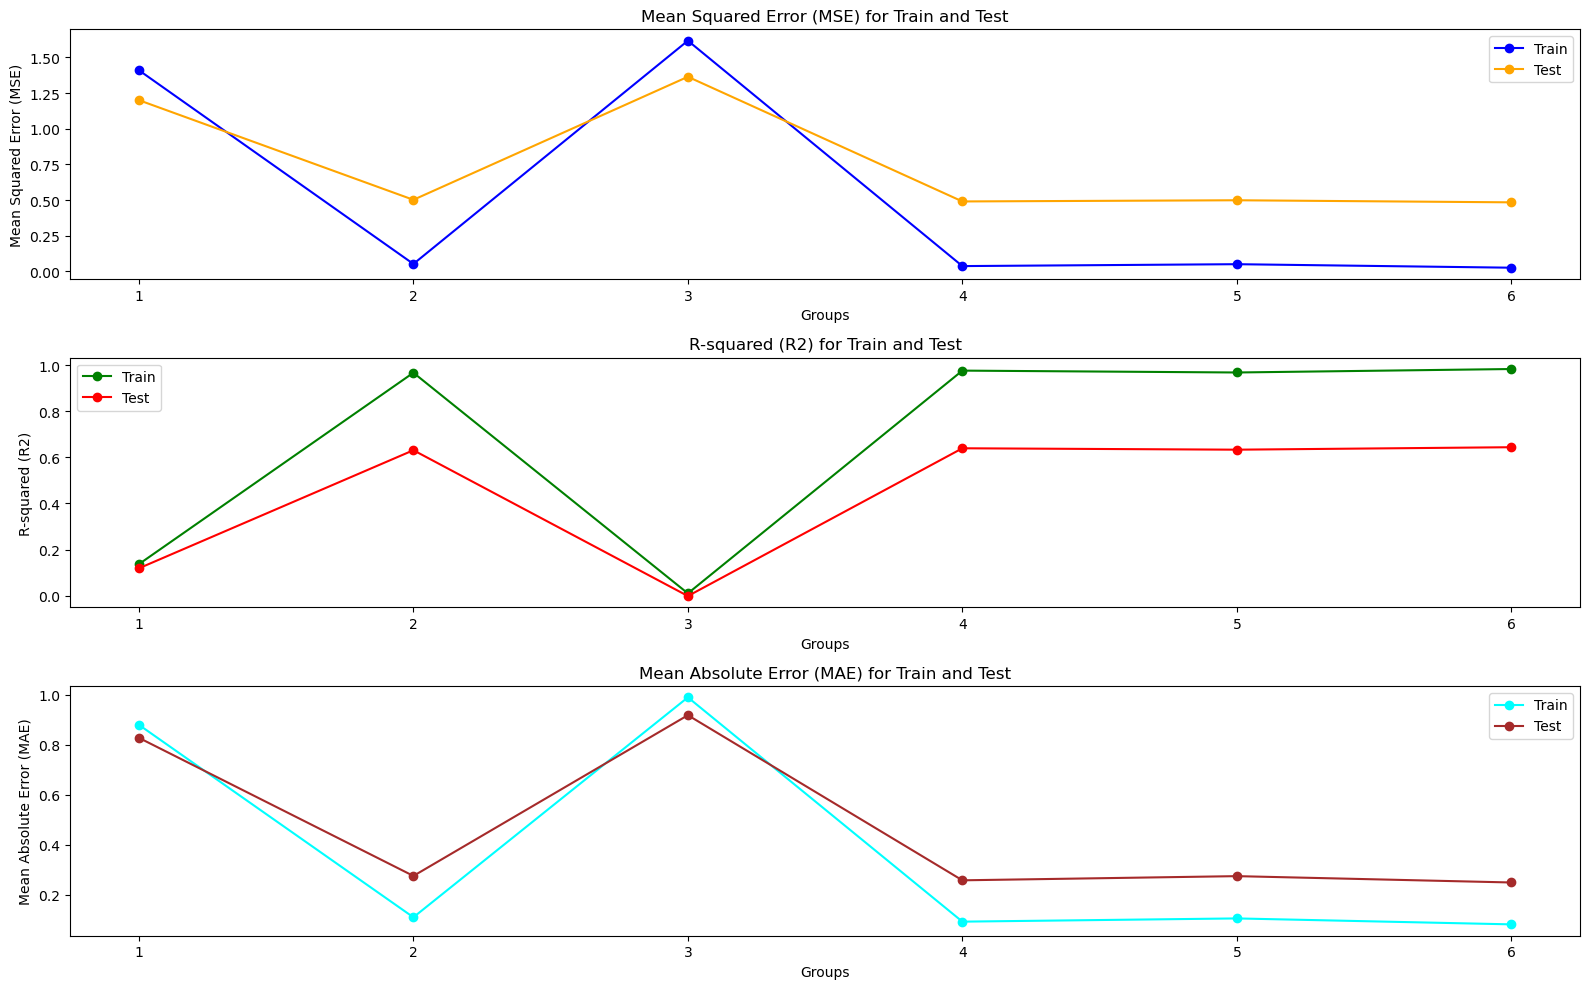

In [17]:
# Plot results
plt.figure(figsize=(16, 10))

# MSE Plot
plt.subplot(3, 1, 1)
plt.plot(range(1, 7), MSE_train, marker='o', linestyle='-', color='blue', label='Train')
plt.plot(range(1, 7), MSE_test, marker='o', linestyle='-', color='orange', label='Test')
plt.xlabel('Groups')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Train and Test')
plt.legend()

# R2 Plot
plt.subplot(3, 1, 2)
plt.plot(range(1, 7), R2_train, marker='o', linestyle='-', color='green', label='Train')
plt.plot(range(1, 7), R2_test, marker='o', linestyle='-', color='red', label='Test')
plt.xlabel('Groups')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) for Train and Test')
plt.legend()


# MAE Plot
plt.subplot(3, 1, 3)
plt.plot(range(1, 7), MAE_train, marker='o', linestyle='-', color='cyan', label='Train')
plt.plot(range(1, 7), MAE_test, marker='o', linestyle='-', color='brown', label='Test')
plt.xlabel('Groups')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) for Train and Test')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model

In [16]:
utils.save_model(DTR,"DTR_v1")

Reuse the model by loading

In [18]:
DTR = utils.load_model("DTR_v1")

DTR

DecisionTreeRegressor(max_depth=13)